# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Reading train and test data

In [2]:
train_data = pd.read_csv("train_indessa.csv")
test_data=pd.read_csv('test_indessa.csv')

pd.set_option('display.max_columns', None)
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
print(train_data.shape)
print(test_data.shape)

(532428, 45)
(354951, 44)
(532428, 45)
(354951, 44)


# Checking Missing values

In [4]:
train_data.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [5]:
train_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [6]:
train_data.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [7]:
((train_data.isnull().sum()/train_data.isnull().count())*100).sort_values(ascending=False)

verification_status_joint      99.942715
desc                           85.801085
mths_since_last_record         84.575755
mths_since_last_major_derog    75.023853
mths_since_last_delinq         51.190771
batch_enrolled                 15.992585
tot_coll_amt                    7.889142
total_rev_hi_lim                7.889142
tot_cur_bal                     7.889142
emp_title                       5.791018
emp_length                      5.050636
revol_util                      0.053904
collections_12_mths_ex_med      0.017843
title                           0.016904
pub_rec                         0.003005
delinq_2yrs                     0.003005
open_acc                        0.003005
inq_last_6mths                  0.003005
acc_now_delinq                  0.003005
total_acc                       0.003005
annual_inc                      0.000563
sub_grade                       0.000000
verification_status             0.000000
grade                           0.000000
int_rate        

verification_status_joint      99.942715
desc                           85.801085
mths_since_last_record         84.575755
mths_since_last_major_derog    75.023853
mths_since_last_delinq         51.190771
batch_enrolled                 15.992585
tot_coll_amt                    7.889142
total_rev_hi_lim                7.889142
tot_cur_bal                     7.889142
emp_title                       5.791018
emp_length                      5.050636
revol_util                      0.053904
collections_12_mths_ex_med      0.017843
title                           0.016904
pub_rec                         0.003005
delinq_2yrs                     0.003005
open_acc                        0.003005
inq_last_6mths                  0.003005
acc_now_delinq                  0.003005
total_acc                       0.003005
annual_inc                      0.000563
sub_grade                       0.000000
verification_status             0.000000
grade                           0.000000
int_rate        

In [8]:
((test_data.isnull().sum()/test_data.isnull().count())*100).sort_values(ascending=False)

verification_status_joint      99.941964
desc                           85.862556
mths_since_last_record         84.524625
mths_since_last_major_derog    75.004156
mths_since_last_delinq         51.206505
batch_enrolled                 12.846562
total_rev_hi_lim                7.965043
tot_coll_amt                    7.965043
tot_cur_bal                     7.965043
emp_title                       5.811788
emp_length                      5.052528
revol_util                      0.060572
title                           0.017467
collections_12_mths_ex_med      0.014086
inq_last_6mths                  0.003662
pub_rec                         0.003662
open_acc                        0.003662
delinq_2yrs                     0.003662
total_acc                       0.003662
acc_now_delinq                  0.003662
annual_inc                      0.000282
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term            

verification_status_joint      99.941964
desc                           85.862556
mths_since_last_record         84.524625
mths_since_last_major_derog    75.004156
mths_since_last_delinq         51.206505
batch_enrolled                 12.846562
total_rev_hi_lim                7.965043
tot_coll_amt                    7.965043
tot_cur_bal                     7.965043
emp_title                       5.811788
emp_length                      5.052528
revol_util                      0.060572
title                           0.017467
collections_12_mths_ex_med      0.014086
inq_last_6mths                  0.003662
pub_rec                         0.003662
open_acc                        0.003662
delinq_2yrs                     0.003662
total_acc                       0.003662
acc_now_delinq                  0.003662
annual_inc                      0.000282
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term            

In [9]:
# Dropping the column with less percentage of missing values

In [10]:
train_data.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint'], axis = 1 ,inplace = True)
test_data.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint'], axis = 1 ,inplace = True)

# Analyzing the data

In [11]:
train_data['batch_enrolled'].value_counts()

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

In [12]:
len(train_data['batch_enrolled'].unique())

105

105

In [13]:
train_data['batch_enrolled'].unique()

array([' ', 'BAT1586599', 'BAT4808022', 'BAT2833642', 'BAT2575549', nan,
       'BAT4136152', 'BAT4694572', 'BAT5924421', 'BAT3193689',
       'BAT224923', 'BAT1184694', 'BAT1930365', 'BAT3873588',
       'BAT2252229', 'BAT1135695', 'BAT4271519', 'BAT3726927',
       'BAT2803411', 'BAT1104812', 'BAT5341619', 'BAT3865626',
       'BAT1780517', 'BAT2522922', 'BAT2558388', 'BAT2428731',
       'BAT3943761', 'BAT2333412', 'BAT5849876', 'BAT5540558',
       'BAT2136391', 'BAT1761981', 'BAT47674', 'BAT1327206', 'BAT1467036',
       'BAT2003848', 'BAT4722912', 'BAT4201183', 'BAT5525466',
       'BAT5489674', 'BAT2078974', 'BAT4351734', 'BAT2677031',
       'BAT3461431', 'BAT3292317', 'BAT1766061', 'BAT1914408',
       'BAT1942645', 'BAT5458862', 'BAT2015867', 'BAT1691418',
       'BAT5877328', 'BAT5614983', 'BAT1755192', 'BAT4786748',
       'BAT5811547', 'BAT2881062', 'BAT4051248', 'BAT5629144',
       'BAT5714674', 'BAT3372536', 'BAT1273836', 'BAT3260421',
       'BAT2881453', 'BAT5320519',

array([' ', 'BAT1586599', 'BAT4808022', 'BAT2833642', 'BAT2575549', nan,
       'BAT4136152', 'BAT4694572', 'BAT5924421', 'BAT3193689',
       'BAT224923', 'BAT1184694', 'BAT1930365', 'BAT3873588',
       'BAT2252229', 'BAT1135695', 'BAT4271519', 'BAT3726927',
       'BAT2803411', 'BAT1104812', 'BAT5341619', 'BAT3865626',
       'BAT1780517', 'BAT2522922', 'BAT2558388', 'BAT2428731',
       'BAT3943761', 'BAT2333412', 'BAT5849876', 'BAT5540558',
       'BAT2136391', 'BAT1761981', 'BAT47674', 'BAT1327206', 'BAT1467036',
       'BAT2003848', 'BAT4722912', 'BAT4201183', 'BAT5525466',
       'BAT5489674', 'BAT2078974', 'BAT4351734', 'BAT2677031',
       'BAT3461431', 'BAT3292317', 'BAT1766061', 'BAT1914408',
       'BAT1942645', 'BAT5458862', 'BAT2015867', 'BAT1691418',
       'BAT5877328', 'BAT5614983', 'BAT1755192', 'BAT4786748',
       'BAT5811547', 'BAT2881062', 'BAT4051248', 'BAT5629144',
       'BAT5714674', 'BAT3372536', 'BAT1273836', 'BAT3260421',
       'BAT2881453', 'BAT5320519',

In [14]:
train_data['batch_enrolled'].value_counts()

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

In [15]:
len(train_data['emp_title'].unique())

190125

190125

In [16]:
train_data['emp_title'].value_counts()

Teacher                                8280
Manager                                6922
Registered Nurse                       3387
Owner                                  3305
RN                                     3255
                                       ... 
MILITARY INSTRUCTOR                       1
Store Managre                             1
Commonwealth Foreign Exchange, Inc.       1
Subsurface Engineering Technician         1
Information Specialist 2                  1
Name: emp_title, Length: 190124, dtype: int64

Teacher                                8280
Manager                                6922
Registered Nurse                       3387
Owner                                  3305
RN                                     3255
                                       ... 
MILITARY INSTRUCTOR                       1
Store Managre                             1
Commonwealth Foreign Exchange, Inc.       1
Subsurface Engineering Technician         1
Information Specialist 2                  1
Name: emp_title, Length: 190124, dtype: int64

In [17]:
gkk = train_data.groupby(['emp_title'])['annual_inc'].mean()
gkk

emp_title
\tAdv Mtr Proj Fld Rep                       35000.0
 (RED),  a division of The ONE Campaign     130000.0
 A Red Thread Adoption Services, Inc.        75000.0
 AVP, Private Client Support                 50000.0
 Cook, Server, Prep, Deli, and On The Go     25000.0
                                              ...   
zoning inspector                             90000.0
zookeeper                                    35000.0
zoom de italy                                48800.0
År.  Technical Illustrator                  52000.0
​License Compliance Investigator             60000.0
Name: annual_inc, Length: 190124, dtype: float64

emp_title
\tAdv Mtr Proj Fld Rep                       35000.0
 (RED),  a division of The ONE Campaign     130000.0
 A Red Thread Adoption Services, Inc.        75000.0
 AVP, Private Client Support                 50000.0
 Cook, Server, Prep, Deli, and On The Go     25000.0
                                              ...   
zoning inspector                             90000.0
zookeeper                                    35000.0
zoom de italy                                48800.0
År.  Technical Illustrator                  52000.0
​License Compliance Investigator             60000.0
Name: annual_inc, Length: 190124, dtype: float64

In [18]:
train_data['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

0    406601
1    125827
Name: loan_status, dtype: int64

In [19]:
inc = train_data.groupby(['emp_title', 'emp_length'])['annual_inc'].mean().reset_index().rename(columns = {0:'average salary'})
inc

,emp_title,emp_length,annual_inc
0,\tAdv Mtr Proj Fld Rep,1 year,35000.0
1,"(RED), a division of The ONE Campaign",< 1 year,130000.0
2,"A Red Thread Adoption Services, Inc.",10+ years,75000.0
3,"AVP, Private Client Support",10+ years,50000.0
4,"Cook, Server, Prep, Deli, and On The Go",< 1 year,25000.0
...,...,...,...
260709,zoning inspector,3 years,90000.0
260710,zookeeper,1 year,35000.0
260711,zoom de italy,7 years,48800.0
260712,År. Technical Illustrator,3 years,52000.0


,emp_title,emp_length,annual_inc
0,\tAdv Mtr Proj Fld Rep,1 year,35000.0
1,"(RED), a division of The ONE Campaign",< 1 year,130000.0
2,"A Red Thread Adoption Services, Inc.",10+ years,75000.0
3,"AVP, Private Client Support",10+ years,50000.0
4,"Cook, Server, Prep, Deli, and On The Go",< 1 year,25000.0
...,...,...,...
260709,zoning inspector,3 years,90000.0
260710,zookeeper,1 year,35000.0
260711,zoom de italy,7 years,48800.0
260712,År. Technical Illustrator,3 years,52000.0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

<AxesSubplot:xlabel='loan_status', ylabel='count'>

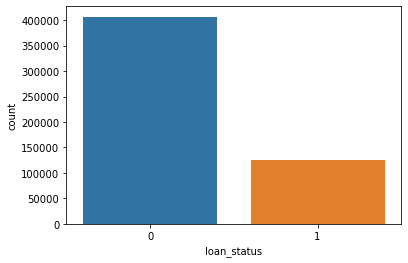

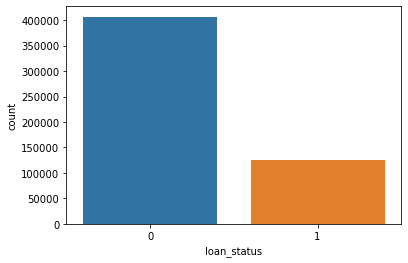

In [20]:
import seaborn as sns
sns.countplot(train_data['loan_status'])

<AxesSubplot:>

<AxesSubplot:>

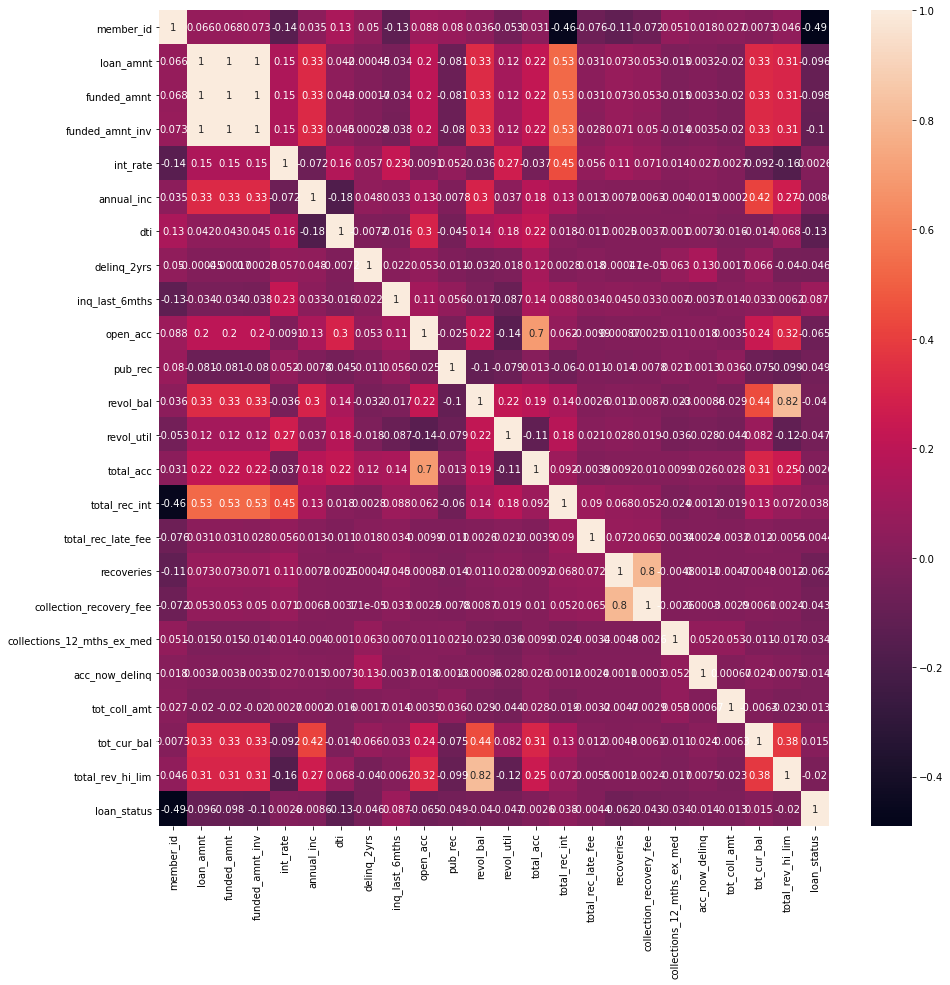

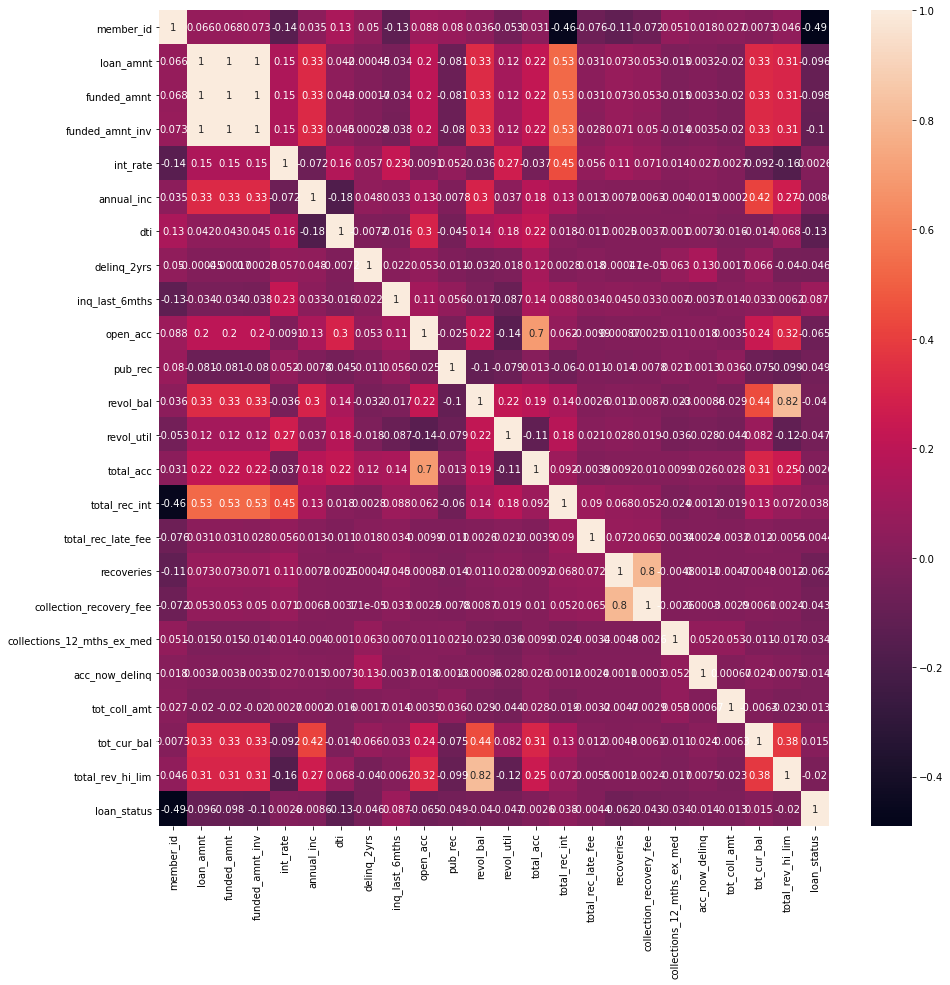

In [21]:
plt.figure(figsize= (15,15))
sns.heatmap(train_data.corr(), annot = True)

In [22]:
train_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [23]:
train_data['batch_enrolled'] = train_data['batch_enrolled'].fillna("No Batch")
test_data['batch_enrolled'] = test_data['batch_enrolled'].fillna("No Batch")

In [24]:
cols = ['delinq_2yrs','inq_last_6mths','emp_title','emp_length','open_acc','pub_rec','title','revol_util', 'total_acc', 'collections_12_mths_ex_med','acc_now_delinq',
       'tot_cur_bal', 'total_rev_hi_lim','tot_coll_amt']
train_data.dropna(subset = cols, axis = 0 , inplace = True)
test_data.dropna(subset = cols, axis = 0 , inplace = True)

In [25]:
train_data.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [26]:
test_data.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [27]:
for i in train_data.columns:
    print(i , train_data[i].unique())

member_id [58189336 70011223 70255675 ...  7357607 23182668 46122259]
loan_amnt [14350  4800 10000 ... 30525 32825 34600]
funded_amnt [14350  4800 10000 ... 30525 32825 34600]
funded_amnt_inv [14350.          4800.         10000.         ...  9994.22283785
  6471.29247152   975.        ]
term ['36 months' '60 months']
batch_enrolled [' ' 'BAT1586599' 'BAT4808022' 'BAT2833642' 'BAT2575549' 'No Batch'
 'BAT4136152' 'BAT4694572' 'BAT5924421' 'BAT3193689' 'BAT224923'
 'BAT1184694' 'BAT1930365' 'BAT3873588' 'BAT2252229' 'BAT4271519'
 'BAT1104812' 'BAT5341619' 'BAT1135695' 'BAT3865626' 'BAT1780517'
 'BAT2522922' 'BAT2558388' 'BAT2428731' 'BAT2803411' 'BAT3726927'
 'BAT5849876' 'BAT1761981' 'BAT1467036' 'BAT2333412' 'BAT2003848'
 'BAT5525466' 'BAT5489674' 'BAT2078974' 'BAT4351734' 'BAT2136391'
 'BAT3461431' 'BAT1766061' 'BAT4722912' 'BAT5811547' 'BAT5629144'
 'BAT5714674' 'BAT5547201']
int_rate member_id [58189336 70011223 70255675 ...  7357607 23182668 46122259]
loan_amnt [14350  4800 10000 

pub_rec ['Debt consolidation' 'Home improvement' 'refi' ... 'The Future'
 'Relieve Stress' 'billspayoff']
zip_code ['349xx' '209xx' '447xx' '221xx' '900xx' '461xx' '913xx' '351xx' '917xx'
 '427xx' '875xx' '926xx' '381xx' '773xx' '922xx' '919xx' '666xx' '606xx'
 '322xx' '928xx' '631xx' '337xx' '285xx' '764xx' '352xx' '757xx' '073xx'
 '067xx' '902xx' '750xx' '953xx' '662xx' '171xx' '760xx' '939xx' '079xx'
 '125xx' '190xx' '908xx' '466xx' '064xx' '168xx' '038xx' '498xx' '430xx'
 '083xx' '852xx' '871xx' '301xx' '840xx' '076xx' '330xx' '490xx' '740xx'
 '891xx' '282xx' '553xx' '423xx' '195xx' '791xx' '273xx' '380xx' '305xx'
 '057xx' '327xx' '019xx' '107xx' '198xx' '708xx' '949xx' '670xx' '114xx'
 '287xx' '021xx' '224xx' '232xx' '850xx' '566xx' '628xx' '112xx' '320xx'
 '799xx' '283xx' '920xx' '103xx' '770xx' '729xx' '410xx' '782xx' '015xx'
 '378xx' '554xx' '761xx' '442xx' '100xx' '344xx' '201xx' '981xx' '020xx'
 '982xx' '278xx' '720xx' '816xx' '254xx' '074xx' '444xx' '113xx' '481xx'
 '405xx' 

pub_rec [ 1.  0.  2.  3.  4.  5.  6.  7. 10.  8. 12.  9. 28. 21. 11. 13. 16. 17.
 20. 23. 49. 63. 14. 15. 40. 18. 22. 86.]
revol_bal [22515.  7624. 10877. ... 81363. 75542. 77432.]
revol_util [ 73.1  23.2  31.2 ... 123.2 121.1 114.7]
total_acc [ 28.  13.  19.  21.  27.  30.  23.  49.  32.  31.  39.  17.  24.  35.
  25.   9.  34.  14.   5.  37.  48.  18.  38.  55.  29.  36.  51.  11.
  10.  15.  20.  63.  22.  16.  40.  43.  59.  47.  41.  26.   8.   4.
   7.  58.  52.  12.  33.  57.  54.  53.  45.  42.  44.   6.  62.  60.
  50.  61.  68.  46.  56.  85.  70.   3.  73.  72.  77.  82.  78.  94.
  66.  86.  65.  67.  64.  79.  80.  71.  69.  81. 110.  96.  74. 112.
  75.  87.  97.  90.  76.  91.  95.  92.  84. 104. 102.  83.   2. 111.
  88.  89. 126. 130. 105. 124.  93. 106. 101.  99. 138. 116. 100. 113.
 135. 127. 129. 119. 109.  98. 162. 107. 114. 117. 140. 103. 156.]
initial_list_status ['f' 'w']
 [ 1.  0.  2.  3.  4.  5.  6.  7. 10.  8. 12.  9. 28. 21. 11. 13. 16. 17.
 20. 23. 49. 63. 

# Data Cleaning

In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
def clean_text(raw_text):
    cleantext = np.nan
    if type(raw_text) == str :
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, ' ', raw_text)
        cleantext = cleantext.replace('>', '')
        cleantext = ' '.join(cleantext.split())
        
        stop_words = set(stopwords.words("english"))
        words = word_tokenize(cleantext)
        
        filtered_sentence = []

        for w in words:
            if w not in stop_words:
                filtered_sentence.append(w)
        return len(filtered_sentence)
    
    else :
        return 0 

In [29]:
train_data['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
train_data['emp_length'].replace('n/a', '0', inplace=True)
train_data['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
train_data['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
train_data['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
train_data['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
train_data['zip_code'] = train_data['zip_code'].str.replace("xx"," ")
train_data['last_week_pay'] = train_data['last_week_pay'].str.replace("th", " ")
train_data['last_week_pay'] = train_data['last_week_pay'].str.replace("week", " ")
train_data['last_week_pay'] = train_data['last_week_pay'].str.replace("NA", "0")

In [30]:
test_data['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
test_data['emp_length'].replace('n/a', '0', inplace=True)
test_data['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
test_data['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
test_data['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
test_data['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
test_data['zip_code'] = test_data['zip_code'].str.replace("xx"," ")
test_data['last_week_pay'] = test_data['last_week_pay'].str.replace("th", " ")
test_data['last_week_pay'] = test_data['last_week_pay'].str.replace("week", " ")
test_data['last_week_pay'] = test_data['last_week_pay'].str.replace("NA", "0")

In [31]:
train_data['zip_code'].dtype

dtype('O')

dtype('O')

In [32]:
train_data['last_week_pay'].dtype

dtype('O')

dtype('O')

In [33]:
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,9,OWN,28700.0,Source Verified,n,debt_consolidation,Debt consolidation,349,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,0,MORTGAGE,65000.0,Source Verified,n,home_improvement,Home improvement,209,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2,OWN,45000.0,Not Verified,n,debt_consolidation,Debt consolidation,447,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10,RENT,105000.0,Not Verified,n,debt_consolidation,Debt consolidation,221,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,RENT,52000.0,Verified,n,credit_card,refi,900,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,9,OWN,28700.0,Source Verified,n,debt_consolidation,Debt consolidation,349,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,0,MORTGAGE,65000.0,Source Verified,n,home_improvement,Home improvement,209,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2,OWN,45000.0,Not Verified,n,debt_consolidation,Debt consolidation,447,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10,RENT,105000.0,Not Verified,n,debt_consolidation,Debt consolidation,221,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,RENT,52000.0,Verified,n,credit_card,refi,900,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0


In [34]:
#sns.pairplot(train_data , hue = 'loan_status')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_status', ylabel='Density'>

<AxesSubplot:xlabel='loan_status', ylabel='Density'>

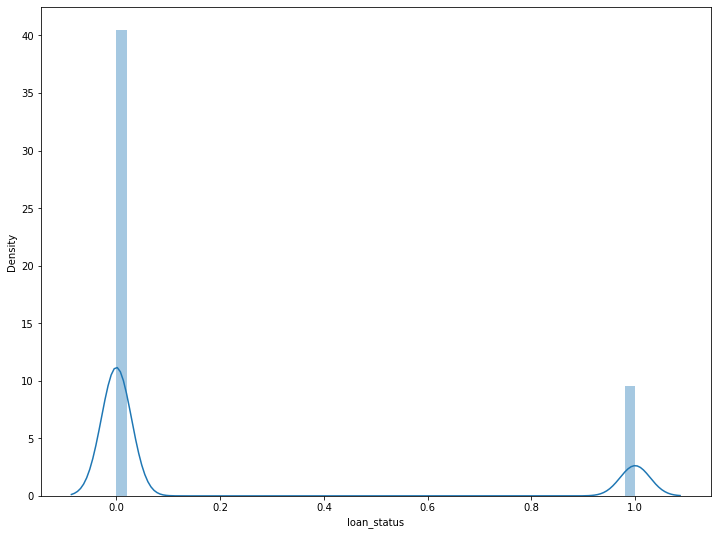

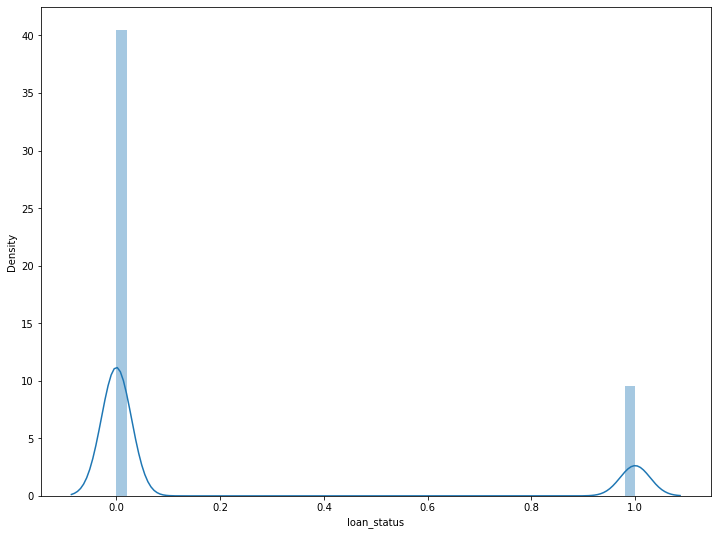

In [35]:
plt.figure(figsize = (12,9))
sns.distplot(train_data['loan_status'])

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

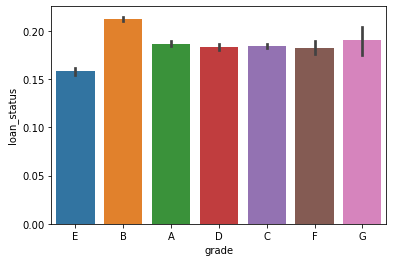

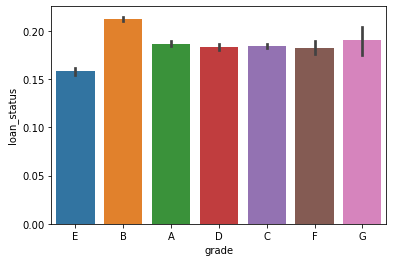

In [36]:
sns.barplot(x = train_data['grade'] ,y = train_data['loan_status'], data =train_data)

In [37]:
#sns.pairplot(train_data , hue = 'loan_status')

In [38]:
train_data.groupby(by=['emp_title'])['annual_inc'].median()

emp_title
\tAdv Mtr Proj Fld Rep                       35000.0
 (RED),  a division of The ONE Campaign     130000.0
 A Red Thread Adoption Services, Inc.        75000.0
 AVP, Private Client Support                 50000.0
 Cook, Server, Prep, Deli, and On The Go     25000.0
                                              ...   
zoning inspector                             90000.0
zookeeper                                    35000.0
zoom de italy                                48800.0
År.  Technical Illustrator                  52000.0
​License Compliance Investigator             60000.0
Name: annual_inc, Length: 164816, dtype: float64

emp_title
\tAdv Mtr Proj Fld Rep                       35000.0
 (RED),  a division of The ONE Campaign     130000.0
 A Red Thread Adoption Services, Inc.        75000.0
 AVP, Private Client Support                 50000.0
 Cook, Server, Prep, Deli, and On The Go     25000.0
                                              ...   
zoning inspector                             90000.0
zookeeper                                    35000.0
zoom de italy                                48800.0
År.  Technical Illustrator                  52000.0
​License Compliance Investigator             60000.0
Name: annual_inc, Length: 164816, dtype: float64

In [39]:
train_data['emp_title'].value_counts()

Teacher                        8271
Manager                        6917
Registered Nurse               3385
Owner                          3298
RN                             3253
                               ... 
ruths chris steak house           1
Delivery Analyst Accountant       1
Communications mgr                1
US FERC                           1
Information Specialist 2          1
Name: emp_title, Length: 164816, dtype: int64

Teacher                        8271
Manager                        6917
Registered Nurse               3385
Owner                          3298
RN                             3253
                               ... 
ruths chris steak house           1
Delivery Analyst Accountant       1
Communications mgr                1
US FERC                           1
Information Specialist 2          1
Name: emp_title, Length: 164816, dtype: int64

In [40]:
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,9,OWN,28700.0,Source Verified,n,debt_consolidation,Debt consolidation,349,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,0,MORTGAGE,65000.0,Source Verified,n,home_improvement,Home improvement,209,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2,OWN,45000.0,Not Verified,n,debt_consolidation,Debt consolidation,447,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10,RENT,105000.0,Not Verified,n,debt_consolidation,Debt consolidation,221,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,RENT,52000.0,Verified,n,credit_card,refi,900,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,9,OWN,28700.0,Source Verified,n,debt_consolidation,Debt consolidation,349,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,0,MORTGAGE,65000.0,Source Verified,n,home_improvement,Home improvement,209,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2,OWN,45000.0,Not Verified,n,debt_consolidation,Debt consolidation,447,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10,RENT,105000.0,Not Verified,n,debt_consolidation,Debt consolidation,221,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,RENT,52000.0,Verified,n,credit_card,refi,900,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0


In [41]:
test_data

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60,BAT4711174,16.24,C,C5,Data Analyst,4,RENT,73500.0,Source Verified,n,credit_card,wrap it up,450,OH,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,INDIVIDUAL,104,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60,BAT4318899,9.49,B,B2,Senior Database Administrator,5,MORTGAGE,105000.0,Source Verified,n,major_purchase,Major purchase,275,NC,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,INDIVIDUAL,57,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60,BAT446479,15.61,D,D1,Customer service representative,10,RENT,62300.0,Not Verified,n,debt_consolidation,Debt consolidation,672,KS,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,INDIVIDUAL,70,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60,BAT4664105,12.69,C,C2,ACCT OFFICER,10,OWN,150000.0,Source Verified,n,debt_consolidation,Debt consolidation,961,CA,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36,,6.89,A,A3,Paralegal,5,MORTGAGE,52000.0,Not Verified,n,major_purchase,Major purchase,707,LA,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,234278.0,26700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354944,70721678,10800,10800,10800.0,60,,20.99,E,E5,Ccr,10,RENT,41000.0,Verified,n,debt_consolidation,Debt consolidation,436,OH,32.70,0.0,3.0,17.0,1.0,3569,31.0,49.0,w,163.72,0.0,0.0,0.0,0.0,INDIVIDUAL,4,0.0,0.0,56129.0,11500.0
354945,70348484,14300,14300,14300.0,36,,15.41,D,D1,Supervisor,10,RENT,52000.0,Verified,n,other,Other,112,NY,19.30,1.0,0.0,15.0,0.0,9687,80.1,33.0,w,159.16,0.0,0.0,0.0,0.0,INDIVIDUAL,4,0.0,0.0,88713.0,12100.0
354946,19145105,15000,15000,15000.0,36,BAT4217242,6.49,A,A2,Network administrator,1,MORTGAGE,97250.0,Not Verified,n,credit_card,Credit card refinancing,761,TX,12.46,0.0,0.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,INDIVIDUAL,83,0.0,0.0,143920.0,44000.0
354947,46304777,35000,35000,35000.0,60,,25.89,G,G3,Credit Risk Analyst,1,OWN,180000.0,Verified,n,debt_consolidation,Debt consolidation,115,NY,11.78,2.0,2.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,INDIVIDUAL,39,0.0,0.0,772713.0,85700.0


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60,BAT4711174,16.24,C,C5,Data Analyst,4,RENT,73500.0,Source Verified,n,credit_card,wrap it up,450,OH,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,INDIVIDUAL,104,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60,BAT4318899,9.49,B,B2,Senior Database Administrator,5,MORTGAGE,105000.0,Source Verified,n,major_purchase,Major purchase,275,NC,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,INDIVIDUAL,57,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60,BAT446479,15.61,D,D1,Customer service representative,10,RENT,62300.0,Not Verified,n,debt_consolidation,Debt consolidation,672,KS,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,INDIVIDUAL,70,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60,BAT4664105,12.69,C,C2,ACCT OFFICER,10,OWN,150000.0,Source Verified,n,debt_consolidation,Debt consolidation,961,CA,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36,,6.89,A,A3,Paralegal,5,MORTGAGE,52000.0,Not Verified,n,major_purchase,Major purchase,707,LA,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,234278.0,26700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354944,70721678,10800,10800,10800.0,60,,20.99,E,E5,Ccr,10,RENT,41000.0,Verified,n,debt_consolidation,Debt consolidation,436,OH,32.70,0.0,3.0,17.0,1.0,3569,31.0,49.0,w,163.72,0.0,0.0,0.0,0.0,INDIVIDUAL,4,0.0,0.0,56129.0,11500.0
354945,70348484,14300,14300,14300.0,36,,15.41,D,D1,Supervisor,10,RENT,52000.0,Verified,n,other,Other,112,NY,19.30,1.0,0.0,15.0,0.0,9687,80.1,33.0,w,159.16,0.0,0.0,0.0,0.0,INDIVIDUAL,4,0.0,0.0,88713.0,12100.0
354946,19145105,15000,15000,15000.0,36,BAT4217242,6.49,A,A2,Network administrator,1,MORTGAGE,97250.0,Not Verified,n,credit_card,Credit card refinancing,761,TX,12.46,0.0,0.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,INDIVIDUAL,83,0.0,0.0,143920.0,44000.0
354947,46304777,35000,35000,35000.0,60,,25.89,G,G3,Credit Risk Analyst,1,OWN,180000.0,Verified,n,debt_consolidation,Debt consolidation,115,NY,11.78,2.0,2.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,INDIVIDUAL,39,0.0,0.0,772713.0,85700.0


# Balancing Data

In [43]:
import sklearn
from imblearn.over_sampling import SMOTE

In [44]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = train_data[(train_data['loan_status']==0)] 
df_minority = train_data[(train_data['loan_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=406601 , # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [45]:
df_upsampled['loan_status'].value_counts()

1    406601
0    373724
Name: loan_status, dtype: int64

1    406601
0    373724
Name: loan_status, dtype: int64

# Label Encoding

In [46]:
columns = ['batch_enrolled','emp_title','grade','sub_grade','pymnt_plan','home_ownership','addr_state','initial_list_status','application_type','verification_status','purpose', 'title']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in columns:
    if isinstance(df_upsampled[i][0], str):
            df_upsampled[i] = le.fit_transform(df_upsampled[i])


In [47]:
columns = ['batch_enrolled','emp_title','grade','sub_grade','pymnt_plan','home_ownership','addr_state','initial_list_status','application_type','verification_status','purpose', 'title']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in columns:
    if isinstance(test_data[i][0], str):
            test_data[i] = le.fit_transform(test_data[i])

In [48]:
df_upsampled

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
95748,4630814,26000,26000,26000.0,36,38,14.09,1,9,76415,10,1,100000.0,2,0,2,5355,640,24,10.94,0.0,0.0,10.0,0.0,16755.0,93.6,36.0,1,4376.36,0.0,0.0,0.0,0.0,0,78,0.0,97.0,218600.0,17900.0,1
5374,6787792,8000,8000,8000.0,36,32,15.31,2,11,97361,1,1,52250.0,0,0,1,6545,711,18,4.94,0.0,2.0,5.0,1.0,6751.0,68.2,11.0,0,1197.98,0.0,0.0,0.0,0.0,0,61,0.0,0.0,103569.0,9900.0,1
465240,72198029,6000,6000,6000.0,36,20,9.17,1,6,108174,0,4,70000.0,1,0,8,13028,070,31,9.43,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0,1.90,0.0,0.0,0.0,0.0,0,0,0.0,0.0,56261.0,10200.0,1
333264,8318024,19075,19075,19075.0,60,9,21.00,4,20,126632,10,1,53000.0,2,0,1,13951,553,23,29.29,0.0,1.0,8.0,0.0,25465.0,96.5,22.0,0,991.61,0.0,0.0,0.0,0.0,0,13,0.0,0.0,57457.0,26400.0,1
37770,61753890,5000,5000,5000.0,36,8,7.89,0,4,129165,10,1,50000.0,1,0,2,6351,606,14,19.04,0.0,0.0,13.0,0.0,25588.0,87.0,30.0,1,83.48,0.0,0.0,0.0,0.0,0,9,0.0,0.0,250851.0,29400.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532421,32097538,13000,13000,13000.0,60,11,12.99,2,10,125952,3,1,55000.0,1,0,2,6351,239,45,4.65,1.0,0.0,11.0,0.0,6638.0,24.7,25.0,0,1916.77,0.0,0.0,0.0,0.0,0,65,0.0,0.0,11231.0,26900.0,0
532423,31296187,20000,20000,20000.0,36,0,12.49,1,9,101714,10,1,75000.0,1,0,2,6351,481,22,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,0,2595.45,0.0,0.0,0.0,0.0,0,65,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,10,14.99,2,14,2849,10,1,59000.0,0,0,2,6351,496,22,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,1,2182.92,0.0,0.0,0.0,0.0,0,70,0.0,0.0,227812.0,17800.0,0
532426,23182668,21000,21000,21000.0,60,22,16.29,3,16,102840,1,5,50000.0,1,0,1,4772,432,35,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,1,4619.79,0.0,0.0,0.0,0.0,0,78,0.0,0.0,29197.0,23300.0,0


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
95748,4630814,26000,26000,26000.0,36,38,14.09,1,9,76415,10,1,100000.0,2,0,2,5355,640,24,10.94,0.0,0.0,10.0,0.0,16755.0,93.6,36.0,1,4376.36,0.0,0.0,0.0,0.0,0,78,0.0,97.0,218600.0,17900.0,1
5374,6787792,8000,8000,8000.0,36,32,15.31,2,11,97361,1,1,52250.0,0,0,1,6545,711,18,4.94,0.0,2.0,5.0,1.0,6751.0,68.2,11.0,0,1197.98,0.0,0.0,0.0,0.0,0,61,0.0,0.0,103569.0,9900.0,1
465240,72198029,6000,6000,6000.0,36,20,9.17,1,6,108174,0,4,70000.0,1,0,8,13028,070,31,9.43,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0,1.90,0.0,0.0,0.0,0.0,0,0,0.0,0.0,56261.0,10200.0,1
333264,8318024,19075,19075,19075.0,60,9,21.00,4,20,126632,10,1,53000.0,2,0,1,13951,553,23,29.29,0.0,1.0,8.0,0.0,25465.0,96.5,22.0,0,991.61,0.0,0.0,0.0,0.0,0,13,0.0,0.0,57457.0,26400.0,1
37770,61753890,5000,5000,5000.0,36,8,7.89,0,4,129165,10,1,50000.0,1,0,2,6351,606,14,19.04,0.0,0.0,13.0,0.0,25588.0,87.0,30.0,1,83.48,0.0,0.0,0.0,0.0,0,9,0.0,0.0,250851.0,29400.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532421,32097538,13000,13000,13000.0,60,11,12.99,2,10,125952,3,1,55000.0,1,0,2,6351,239,45,4.65,1.0,0.0,11.0,0.0,6638.0,24.7,25.0,0,1916.77,0.0,0.0,0.0,0.0,0,65,0.0,0.0,11231.0,26900.0,0
532423,31296187,20000,20000,20000.0,36,0,12.49,1,9,101714,10,1,75000.0,1,0,2,6351,481,22,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,0,2595.45,0.0,0.0,0.0,0.0,0,65,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,10,14.99,2,14,2849,10,1,59000.0,0,0,2,6351,496,22,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,1,2182.92,0.0,0.0,0.0,0.0,0,70,0.0,0.0,227812.0,17800.0,0
532426,23182668,21000,21000,21000.0,60,22,16.29,3,16,102840,1,5,50000.0,1,0,1,4772,432,35,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,1,4619.79,0.0,0.0,0.0,0.0,0,78,0.0,0.0,29197.0,23300.0,0


# Splitting data into X and y

In [49]:
X = df_upsampled.drop('loan_status', axis = 1)
y = df_upsampled['loan_status']

In [50]:
X.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
batch_enrolled                  int32
int_rate                      float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                     object
home_ownership                  int32
annual_inc                    float64
verification_status             int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                       object
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc   

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
batch_enrolled                  int32
int_rate                      float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                     object
home_ownership                  int32
annual_inc                    float64
verification_status             int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                       object
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc   

In [51]:
X['term']=X['term'].astype('int64')
X['zip_code']=X['zip_code'].astype('int64')
X['last_week_pay']=X['last_week_pay'].astype('int64')
X['emp_length']=X['emp_length'].astype('int64')

In [52]:
X.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
batch_enrolled                  int32
int_rate                      float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                      int64
home_ownership                  int32
annual_inc                    float64
verification_status             int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int64
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc   

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
batch_enrolled                  int32
int_rate                      float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                      int64
home_ownership                  int32
annual_inc                    float64
verification_status             int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int64
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc   

In [53]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)
eval_set=[(X_test, y_test)]

# Model Fitting

In [54]:
import xgboost
model = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.09, 
    seed=9616, 
    max_depth=30, 
    gamma=10, 
    n_estimators=500)

In [55]:

model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.97286
[0]	validation_0-auc:0.97286
[1]	validation_0-auc:0.97490
[1]	validation_0-auc:0.97490
[2]	validation_0-auc:0.97595
[2]	validation_0-auc:0.97595
[3]	validation_0-auc:0.97758
[3]	validation_0-auc:0.97758
[4]	validation_0-auc:0.97827
[4]	validation_0-auc:0.97827
[5]	validation_0-auc:0.97895
[5]	validation_0-auc:0.97895
[6]	validation_0-auc:0.97945
[6]	validation_0-auc:0.97945
[7]	validation_0-auc:0.98001
[7]	validation_0-auc:0.98001
[8]	validation_0-auc:0.98040
[8]	validation_0-auc:0.98040
[9]	validation_0-auc:0.98080
[9]	validation_0-auc:0.98080
[10]	validation_0-auc:0.98108
[10]	validation_0-auc:0.98108
[11]	validation_0-auc:0.98143
[11]	validation_0-auc:0.98143
[12]	validation_0-auc:0.98167
[12]	validation_0-auc:0.98167
[13]	validation_0-auc:0.98191
[13]	validation_0-auc:0.98191
[14]	validation_0-auc:0.98206
[14]	validation_0-auc:0.98206
[15]	validation_0-auc:0.98227
[15]	validation_0-auc:0.98227
[16]	validation_0-auc:0.98249
[16]	validation_0-auc:0.98249


[136]	validation_0-auc:0.98802
[136]	validation_0-auc:0.98802
[137]	validation_0-auc:0.98802
[137]	validation_0-auc:0.98802


# Submission File

In [56]:
submission_file_name = "sample_submission"
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

Accuracy: 96.1148749669%
ROC-AUC: 96.0513697904%
Accuracy: 96.1148749669%
ROC-AUC: 96.0513697904%
